### **Loading Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression



# Warning Filter
import warnings
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [2]:
df = pd.read_csv('/content/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### **Learning More about Dataset**

In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
df.shape

(48842, 15)

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.nunique()


age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### **Value Count Function**

In [9]:
df['workclass'].value_counts() #fillna

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
df['occupation'].value_counts() #fillna

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [11]:
df['native-country'].value_counts() #fillna

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [12]:
df['income'].value_counts() #0,1

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [13]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [14]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [15]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

### **Removing rows with ? Values**

In [16]:
# Replacing ? with NaN
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

# Drop rows with any NaN values
df = df.dropna()

# Check the shape of the DataFrame
df.shape

df2=df.copy()

### **Feature Engineering**

In [17]:
# For Education
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
df.education = df.education.replace('HS-grad','High School')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Higher-Education')
df.education = df.education.replace('Bachelors','Under-Grad')
df.education = df.education.replace('Masters','Graduation')
df.education = df.education.replace('Doctorate','Doc')

In [18]:
# For Marital status
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
df['marital-status'] = df['marital-status'].replace(['Never-married'],'Unmarried')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Single')

In [19]:
# For Income
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

In [20]:
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Unmarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,High School,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Higher-Education,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Higher-Education,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,School,6,Unmarried,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Higher-Education,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,High School,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,High School,9,Single,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,High School,9,Unmarried,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [21]:
df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


---
1.   **df= Post  Reductions**

---
2.   **df2= Pre Column Reductions (Used in Plots)**
---

### **Some Graphs and Plots**

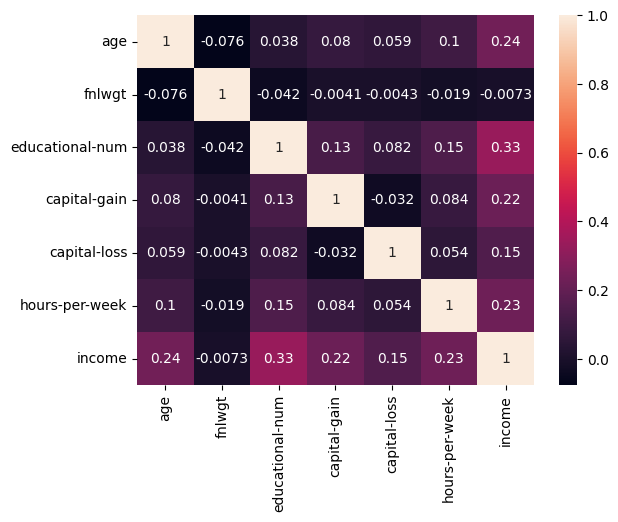

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the heatmap
sns.heatmap(correlation_matrix, annot=True);

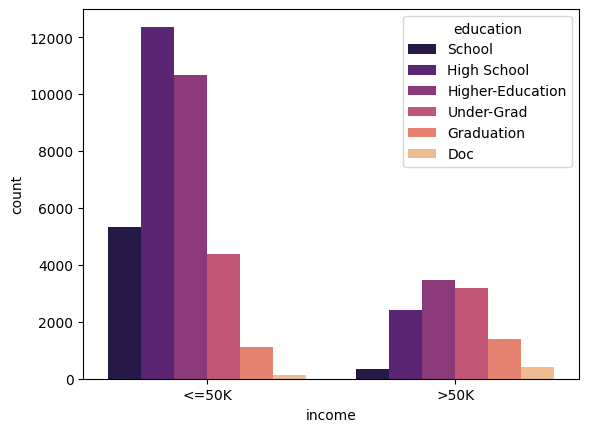

In [23]:
# @title Income with Education
sns.countplot(x=df2['income'],palette='magma',hue='education',data=df);


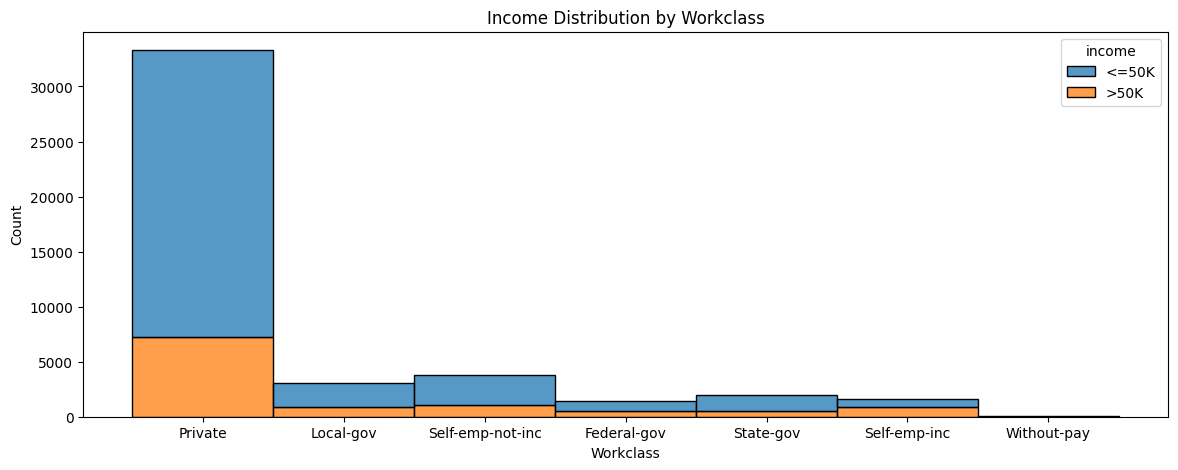

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


In [24]:
# @title Income Distribution by Workclass
plt.figure(figsize=(14,5))
sns.histplot(data=df2, x="workclass", hue="income",multiple="stack")
plt.title("Income Distribution by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()
print(df2['workclass'].unique())

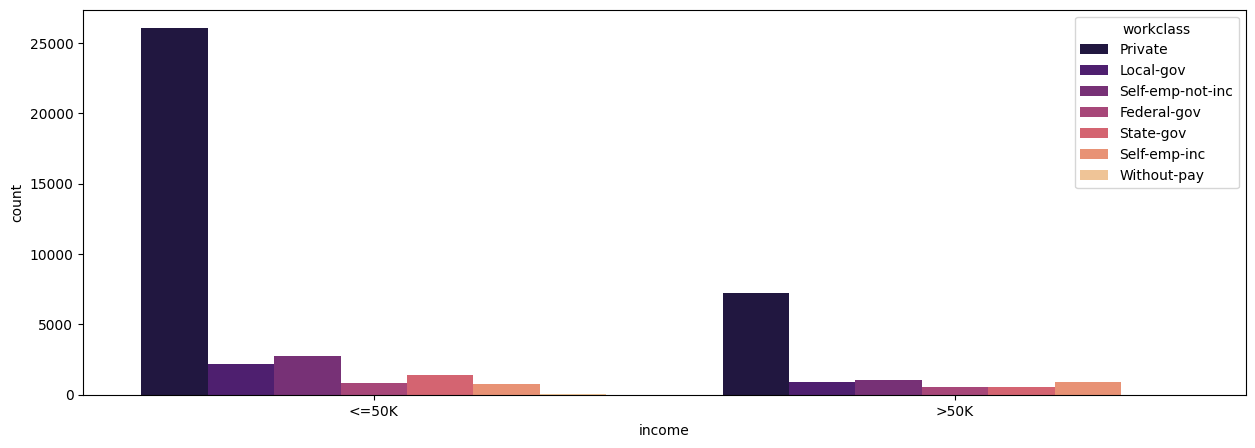

In [25]:
# @title  Income Distribution by Workclass
plt.figure(figsize = (15,5))
sns.countplot(data = df2, x = 'income',palette='magma', hue = 'workclass');


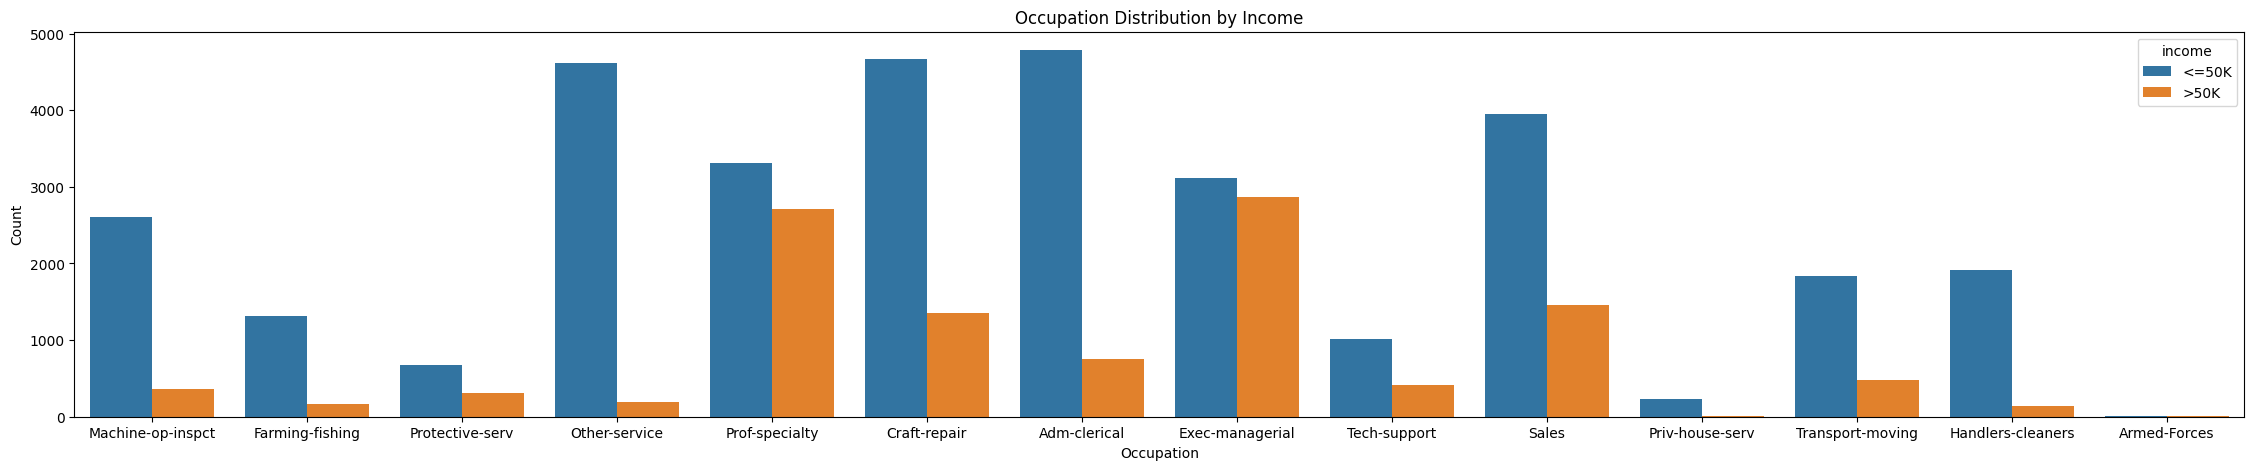

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


In [26]:
# @title Occupation Distribution by Income
plt.figure(figsize=(28,5))
sns.countplot(data=df2, x="occupation", hue="income")
plt.title("Occupation Distribution by Income")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()
print(df2['occupation'].unique())

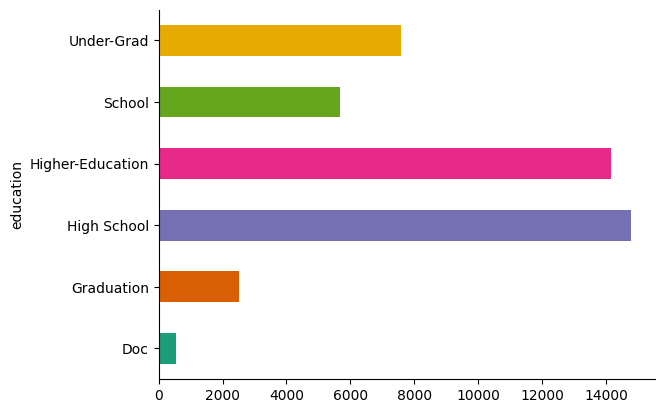

In [27]:
# @title Education Graph 2
df.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

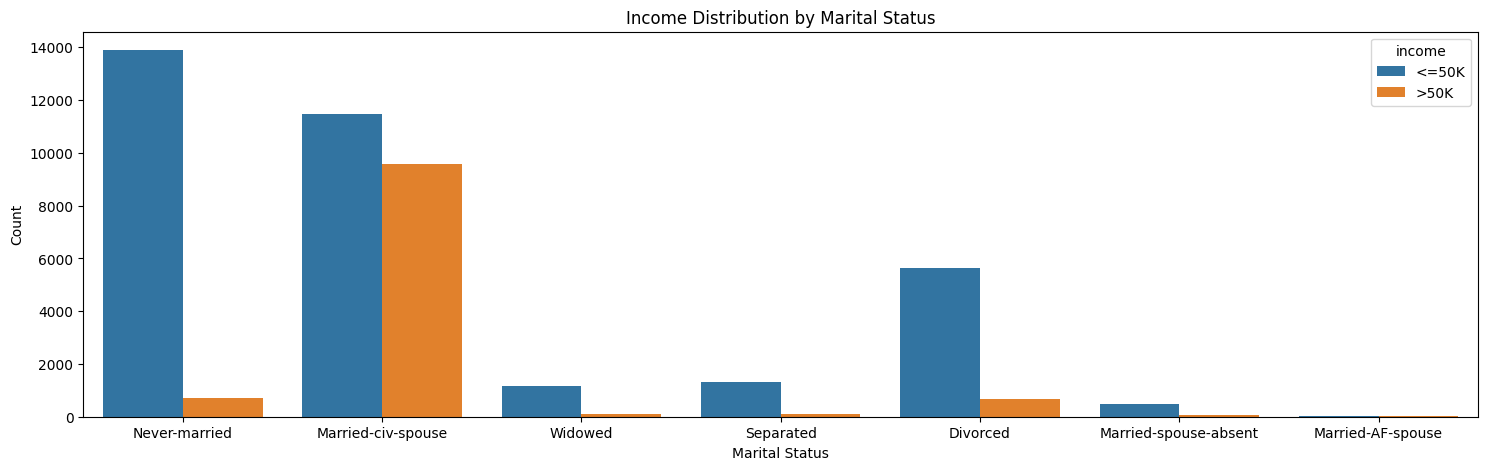

['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


In [28]:
# @title Income Distribution by Marital Status
plt.figure(figsize=(18,5))
sns.countplot(data=df2, x="marital-status", hue="income")
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()
print(df2['marital-status'].unique())

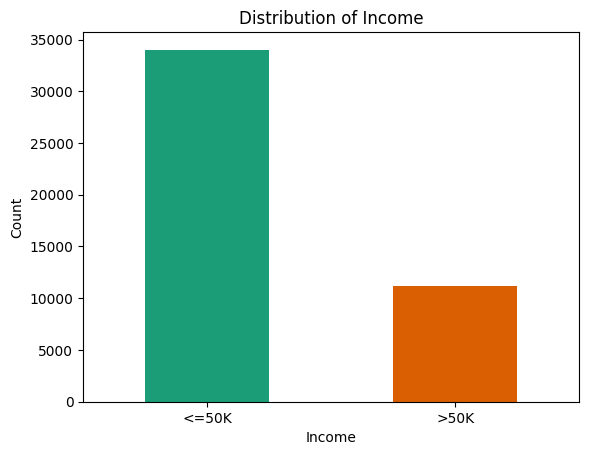

In [29]:
# @title Income Graph
#df2 for income plots
df2['income'].value_counts().plot(kind='bar', color=sns.color_palette('Dark2'))
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

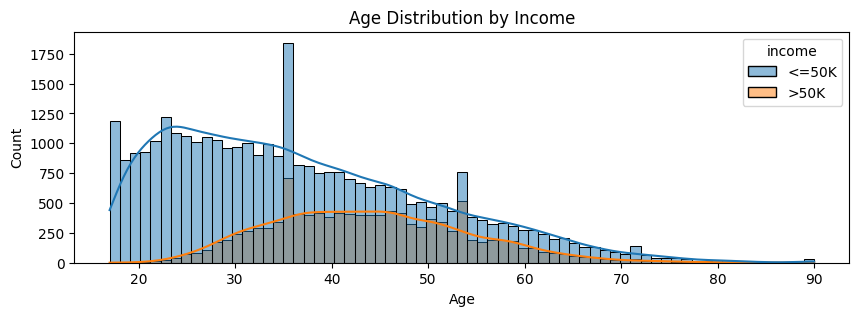

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]


In [30]:
# @title Age Distribution by Income

# Plot the histogram with a custom hue using Seaborn
plt.figure(figsize=(10, 3))
sns.histplot(data=df2, x="age", hue="income", kde=True, multiple="layer")
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Get the sorted unique ages
unique_age = df2['age'].unique()
sorted_age = np.sort(unique_age)
print(sorted_age)


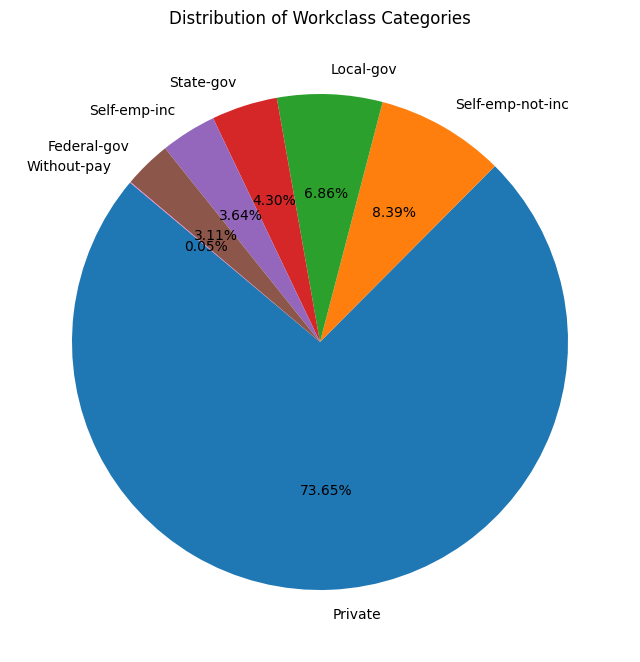

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


In [31]:
# @title Distribution of Workclass Categories
workclass_counts = df2['workclass'].value_counts()
labels = workclass_counts.index
sizes = workclass_counts.values
plt.figure(figsize=(8,14))
plt.pie(sizes,labels=labels, autopct='%1.2f%%', startangle=140)
plt.title("Distribution of Workclass Categories")
plt.show()
print(df2['workclass'].unique())

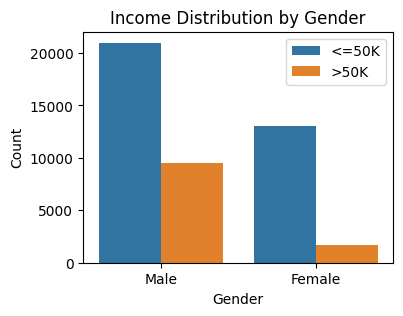

['Male' 'Female']


In [32]:
# @title Income Distribution by Gender
plt.figure(figsize=(4,3))
sns.countplot(data=df2,x="gender",hue="income")
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()
print(df2['gender'].unique())


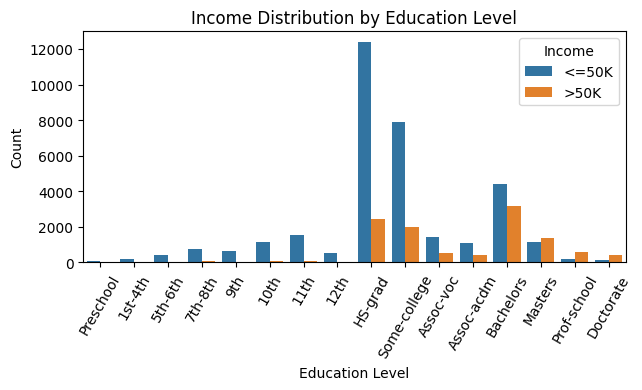

In [33]:
# @title Income Distribution by Education
education_order = df2.sort_values('educational-num')['education'].unique()
plt.figure(figsize=(7,3))
sns.countplot(data=df2,x="education",hue="income",order=education_order)
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.legend(title="Income")
plt.show()

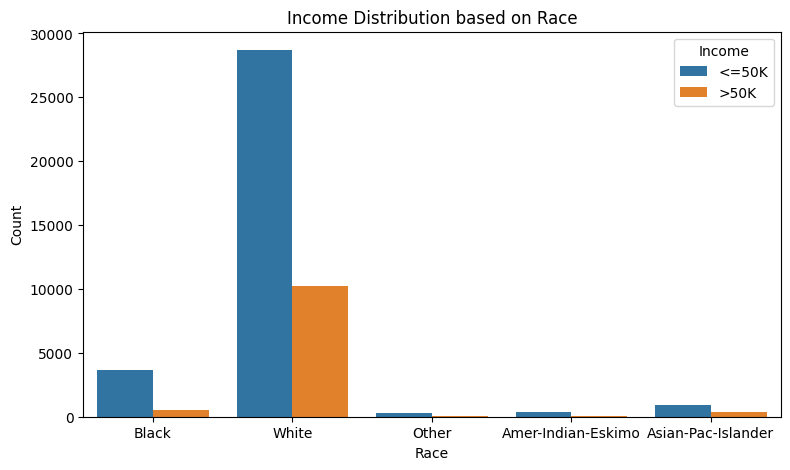

In [36]:
# @title Income Distribution based on Race
plt.figure(figsize=(9, 5))
sns.countplot(data=df2, x="race", hue="income")
plt.title("Income Distribution based on Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()

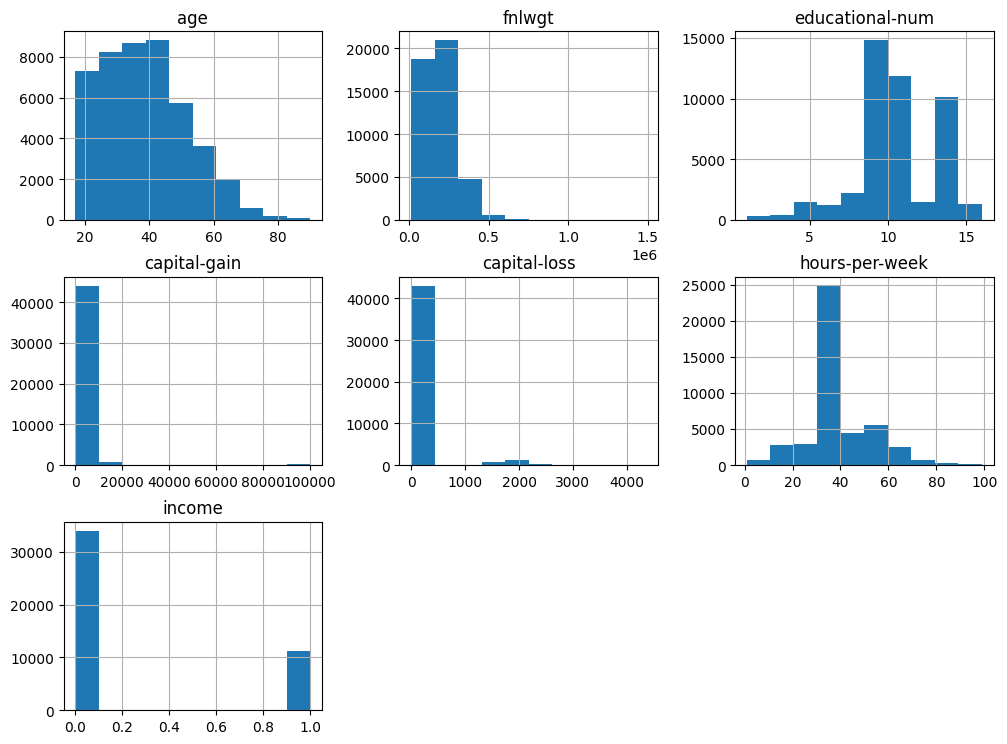

In [37]:
# @title Histogram
df.hist(figsize=(12,12), layout=(4,3), sharex=False);
# Noticeable that most of the data of capital gain and loss is 0 so dropping them
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

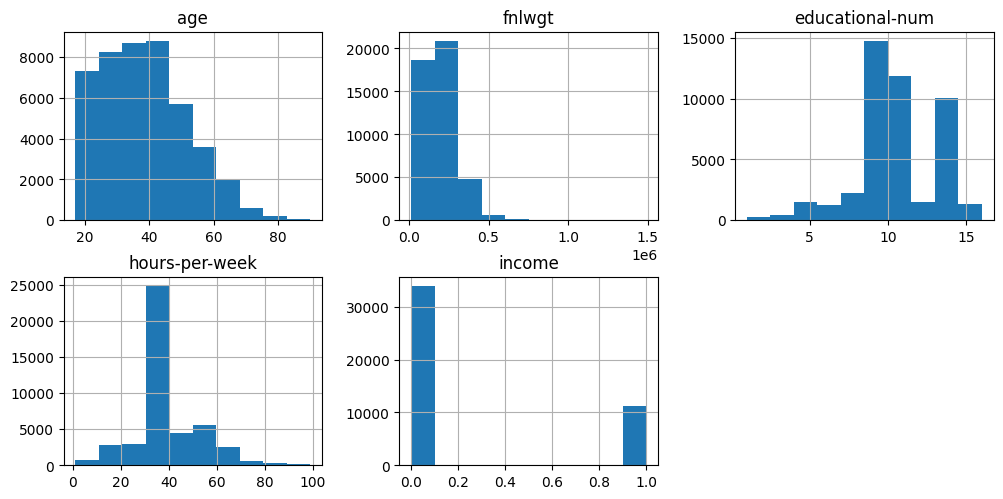

In [38]:
# @title After Dropping capital gain, loss
df.hist(figsize=(12,12), layout=(4,3), sharex=False);


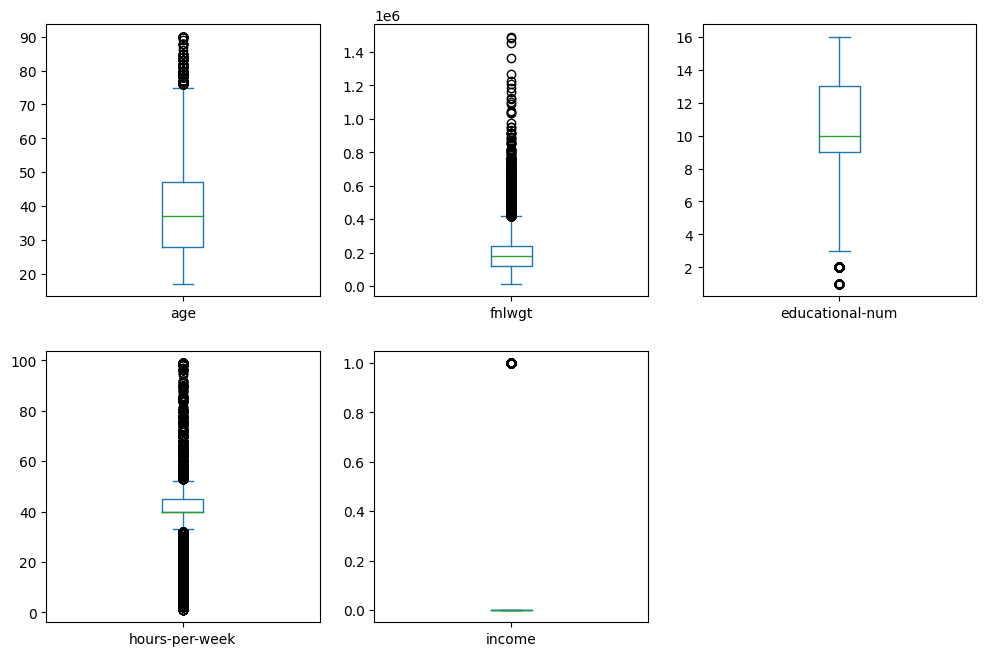

In [39]:
# @title Boxplot for checking Outliers

df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

In [40]:
# To find out the Categorical dataset

categorical_df = df.select_dtypes(object)
categorical_df

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,School,Unmarried,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,High School,Married,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Higher-Education,Married,Protective-serv,Husband,White,Male,United-States
3,Private,Higher-Education,Married,Machine-op-inspct,Husband,Black,Male,United-States
5,Private,School,Unmarried,Other-service,Not-in-family,White,Male,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Higher-Education,Married,Tech-support,Wife,White,Female,United-States
48838,Private,High School,Married,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,High School,Single,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,High School,Unmarried,Adm-clerical,Own-child,White,Male,United-States


In [41]:
#Checking nan values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['education', 'marital-status', 'race', 'gender', 'relationship', 'occupation', 'workclass', 'native-country'])

# Splitting the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 ### **Prediction Models**


In [43]:
# @title K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


# Fitting the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred_knn = knn.predict(X_test)

# Making the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(cm_knn)

# Calculating the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Accuracy:', accuracy_knn)

# Calculating the accuracy score using the confusion matrix
accuracy_from_cm_knn = (cm_knn[0, 0] + cm_knn[1, 1]) / cm_knn.sum()
print('KNN Accuracy from Confusion Matrix:', accuracy_from_cm_knn)

KNN Confusion Matrix:
[[6097  745]
 [ 949 1254]]
KNN Accuracy: 0.8127142067440575
KNN Accuracy from Confusion Matrix: 0.8127142067440575


In [44]:
# @title Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


# Fitting the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predicting the test set results
y_pred_dt = dt.predict(X_test)

# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# Calculating the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Calculating the accuracy score using the confusion matrix
accuracy_from_cm_dt = (cm_dt[0, 0] + cm_dt[1, 1]) / cm_dt.sum()
print('Decision Tree Accuracy from Confusion Matrix:', accuracy_from_cm_dt)


Decision Tree Confusion Matrix:
[[5786 1056]
 [1018 1185]]
Decision Tree Accuracy: 0.770702045328911
Decision Tree Accuracy from Confusion Matrix: 0.770702045328911


In [45]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Fitting the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predicting the test set results
y_pred_rf = rf.predict(X_test)

# Making the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

# Calculating the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# Calculating the accuracy score using the confusion matrix
accuracy_from_cm_rf = (cm_rf[0, 0] + cm_rf[1, 1]) / cm_rf.sum()
print('Random Forest Accuracy from Confusion Matrix:', accuracy_from_cm_rf)


Random Forest Confusion Matrix:
[[6219  623]
 [ 968 1235]]
Random Forest Accuracy: 0.8241017136539525
Random Forest Accuracy from Confusion Matrix: 0.8241017136539525


In [46]:
# @title Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Fitting the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Making the Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# Calculating the accuracy score using the accuracy_score function
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Logistic Regression Accuracy:', accuracy_logreg)

# Calculating the accuracy score using the confusion matrix
accuracy_from_cm_logreg = (cm_logreg[0, 0] + cm_logreg[1, 1]) / cm_logreg.sum()
print('Logistic Regression Accuracy from Confusion Matrix:', accuracy_from_cm_logreg)


Logistic Regression Confusion Matrix:
[[6305  537]
 [ 972 1231]]
Logistic Regression Accuracy: 0.833167495854063
Logistic Regression Accuracy from Confusion Matrix: 0.833167495854063


In [47]:
# @title Accuracy Check

# Summary of Accuracy Scores

print('K Nearest Neighbour Accuracy:', accuracy_from_cm_knn)
print('Decision Tree Accuracy:', accuracy_from_cm_dt)
print('Random Forest Accuracy:', accuracy_from_cm_rf)
print('Logistic Regression Accuracy:', accuracy_from_cm_logreg)


K Nearest Neighbour Accuracy: 0.8127142067440575
Decision Tree Accuracy: 0.770702045328911
Random Forest Accuracy: 0.8241017136539525
Logistic Regression Accuracy: 0.833167495854063
